## Workbook 3: Visualizations

All resources, unless otherwise specified, are created by Nikhil Chinchalkar

You should now feel confident about your ability to import multiple data sources and filter and merge them accordingly to get a single dataset. Once you have that dataset, you might want to visualize certain findings, which is what this notebook is all about.

Visualizations are my favorite aspect of data science because they can tell you so much about a dataset in just a few seconds. Hopefully, the plots we make here have that effect on you too. Honestly, making these plots is the easy part: deciding what you want to visualize and how exactly *to* visualize it is the hard part and is an art form in itself.

### A: Seaborn and Matplotlib 

Seaborn and matplotlib are both plotting libraries in Python. Seaborn is the more simple option, being quick and easy to learn whereas matplotlib is more difficult to interpret but offers more customization. Sometimes they interact, though, so I'll teach them together. For most applications, you'll be fine with just using Seaborn. We'll get started by importing the libraries with their corresponding nicknames:

In [69]:
import pandas as pd
import seaborn as sns
import duckdb
import matplotlib.pyplot as plt

Again, if you get an error importing those packages, then uncomment and run the following lines:

In [68]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


We'll import the dataset we'll be using for these visuals, which is from [Kaggle](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv). This is a dataset that contains historic data about various Olypmics events. You should get a sense of what the dataset looks like by scrolling through a few of the rows and all of the columns.

In [70]:
olympics = pd.read_csv('olympics.csv')

Before we start visualizing, let's see what exactly the dataset looks like, by printing the columns. You can also just get a sense of the dataset by looking at it in Excel or Google Sheets.

In [71]:
olympics.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

We're going to make 3 main plots based on this data: one being a scatter plot, the next a line graph, and finally a histogram. Let's get started with a scatter plot. Here, our overarching goal is to show how different events (hockey, basketball, gymnastics) have different athlete heights and weights.

I'll walk through these plots step by step, with each subsequent call adding to the previous. Let's start by filtering the data a bit.

In [11]:
athletes = duckdb.sql("""SELECT * FROM olympics 
                      WHERE Games = '2016 Summer' AND SEX = 'M'
                      AND (Sport = 'Basketball' OR Sport = 'Hockey' OR Sport = 'Gymnastics')""").df()

athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,576,"Alejandro ""lex"" Abrines Redondo",M,23.0,198.0,93.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Bronze
1,742,Roberto Acua,M,25.0,208.0,109.0,Argentina,ARG,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,None
2,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,None
3,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,None
4,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,None


Hopefully the above is easy to interpret, but all I'm doing is filtering to three sports from the 2016 Summer games (the most recent games in the dataset) and only including males, since differences by height and weight in gender can throw off our plots. The chuck of code below is all we need to start our scatter plot. Here, I'm using Seaborn (sns) to plot based on the `athletes` dataset, with `Height` on the X-axis and `Weight` on the Y. 

<Axes: xlabel='Height', ylabel='Weight'>

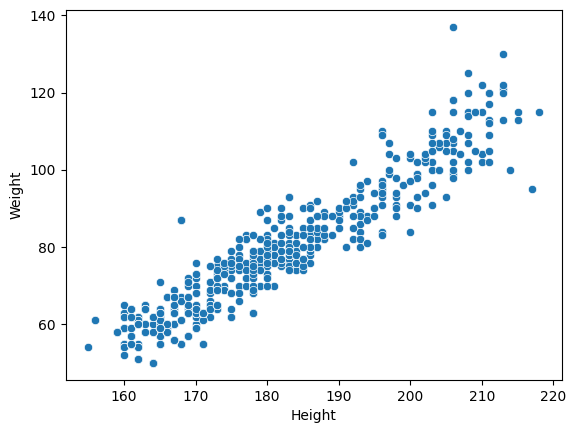

In [12]:
sns.scatterplot(athletes, x='Height',y='Weight')

This is a good start: it matches up with our intuition too, since athletes who are taller probably weight more too. But we want to show a difference in height and weight by sport. To do that, we can just add the `hue` parameter to the `scatterplot` call, which colors the plot based on information in the `hue` column. Though we're technically 'coloring' the plot, the `hue` parameter is different than the `color` parameter. `color` sets the color of all points in the plot based on colors like 'red' or 'blue'. `hue`, on the other hand, can change the color of *certain* points based on the data.

<Axes: xlabel='Height', ylabel='Weight'>

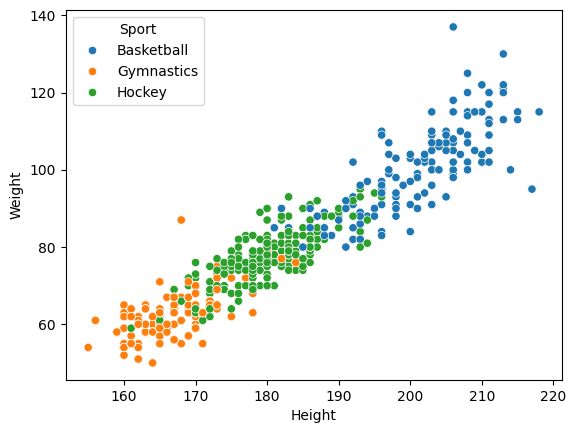

In [13]:
sns.scatterplot(athletes, x='Height',y='Weight', hue='Sport')

This above plot looks pretty nice, and shows some clear differences in athletes across sports: basketball players are much bigger and taller than gymnasts, and hockey players are kind of in the middle of the two. There's a ton more that we could do to the plot but for now we'll just add a title and better X and Y axis labels.

To do this, we'll call on matplotlib to add an `xlabel` to the current plot. We'll do the same for the `ylabel`. Finally, we'll add in a nice title with the `title` command. Also, to get rid of the text that prints whenever we have one of these plots, we'll call `plt.show()` which gets rid of the unneeded printed text.

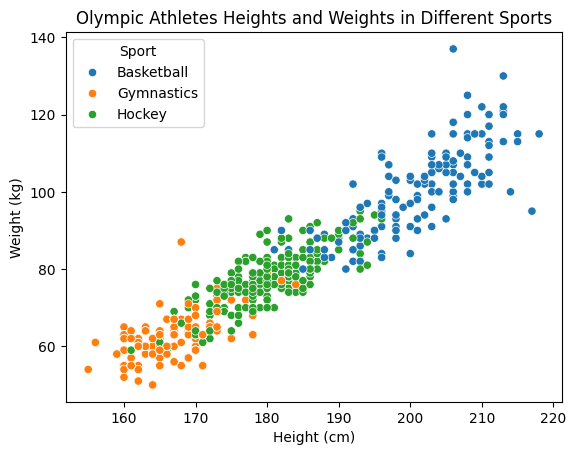

In [20]:
sns.scatterplot(athletes, x='Height',y='Weight', hue='Sport')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Olympic Athletes Heights and Weights in Different Sports')
plt.show()

That's a pretty nice looking plot and conveys information very easily. There's a lot more we could try to do (like annotating in the average male's height and weight for a comparison), but a lot of that is specific to this plot, so there's no point in trying to memorize it. But stuff like axis labels and the initialization call are going to be in 99% of plots, so those are good to know.

Now, we'll pick the pace up and move into line plots. Once again, I'll manipulate our original dataset to get something that could be displayed in lineplot form. The overarching goal here is to see how basketball players' (male and female) heights have changed over time.

In [22]:
athletes_line = duckdb.sql("""SELECT Year, AVG(Height) AS AvgHeight
                           FROM olympics 
                           WHERE Season = 'Summer' AND Sport = 'Basketball'
                           GROUP BY Year
                           ORDER BY Year ASC""").df()

athletes_line.head()

,Year,AvgHeight
0,1936,182.574074
1,1948,185.550725
2,1952,187.600000
3,1956,186.952941
4,1960,188.317708


Now, we'll just plot the `AvgHeight` over time. To do that, we'll use Seaborn's `lineplot` call, with the `Year` on the X and `AvgHeight` on the Y. Remember to supply the actual data to the `lineplot` function call, too.

<Axes: xlabel='Year', ylabel='AvgHeight'>

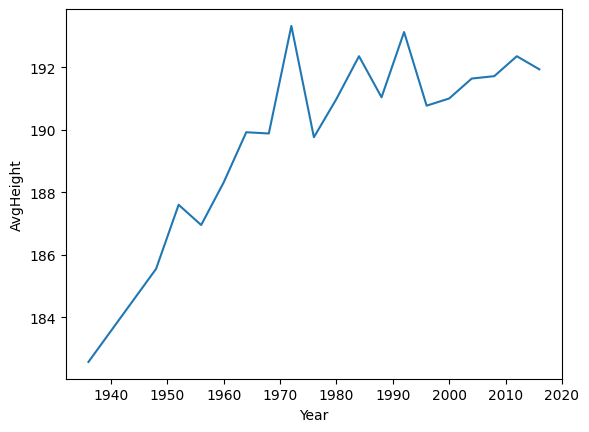

In [23]:
sns.lineplot(athletes_line, x='Year', y='AvgHeight')

As you can see, most of the work for data visualizations is just getting the data in the right format. The visualization part is pretty easy. Now it's your turn. Duplicate the above plot, add an appropriate title, and an appropriate Y-axis label. Also change the *color* of the line to something other than the default shade of blue.

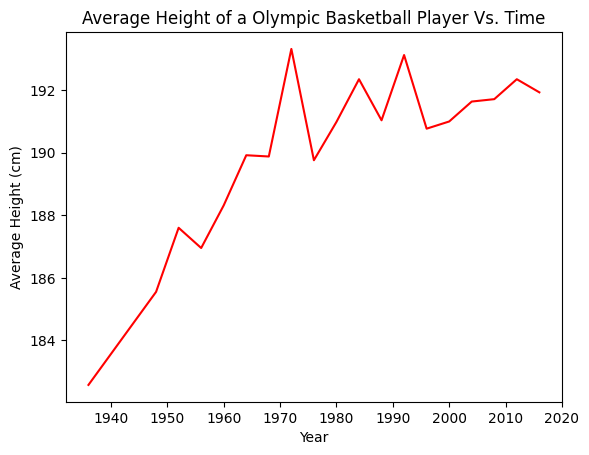

In [72]:
#A1 your code here
sns.lineplot(athletes_line, x='Year', y='AvgHeight', color ='red')
plt.ylabel('Average Height (cm)')
plt.title('Average Height of a Olympic Basketball Player Vs. Time')
plt.show()

Finally, let's do a histogram. For this, we'll try to plot the number of Gold medals each country has earned in the 2012 Summer Olympics. To get started, we'll need to once again manipulate our original dataset. This time I'll turn this task over to you. Remember, we're trying to have a data frame with 2 rows: one for the country and the other that has a *count* of all the (only) gold medals they earned (called `Golds`).

To make sure you get an output that matches up with mine, order `Golds` in descending order and print out the first 5 rows.

Be sure to use the `LIMIT 10` function in the SQL prompt, since we're only going to be looking at the top 10 gold medal getters.

In [44]:
#A2: your code here
golds = duckdb.sql("""SELECT Team, COUNT(Medal) AS Golds
                   FROM olympics
                   WHERE Medal = 'Gold' AND Games = '2012 Summer'
                   GROUP BY Team
                   ORDER BY Golds DESC
                   """).df()

golds.head()

,Team,Golds
0,United States,139
1,China,50
2,Russia,50
3,Great Britain,46
4,Germany,43


Expected Output:

```
            Team  Golds
0  United States    139
1          China     50
2         Russia     50
3  Great Britain     46
4        Germany     43
```

Note that this medal count might differ from what you look up online - don't worry about that: our count will double count team events where more than 1 gold medal is handed out (since we're technically counting the number of *athletes*' gold medals). In an actual data science application we would fix this, but for our sake, it's fine as is.

Now let's work on plotting this in a barplot:

<Axes: xlabel='Team', ylabel='Golds'>

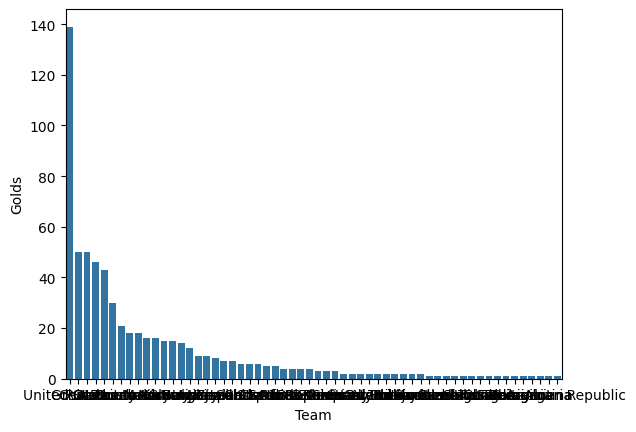

In [45]:
#this line is given to you and should work if the above A2 was done correctly, 
#uncomment it when you've created the data frame 'golds'

sns.barplot(golds, x='Team', y='Golds')

The call is, again, very simple. Still, there's some major improvements that we can make. First of all, we need to rotate the x-ticks so that the country names don't overlap. Then, we'll fix up the axis labels and add a title. This all should look pretty familiar.

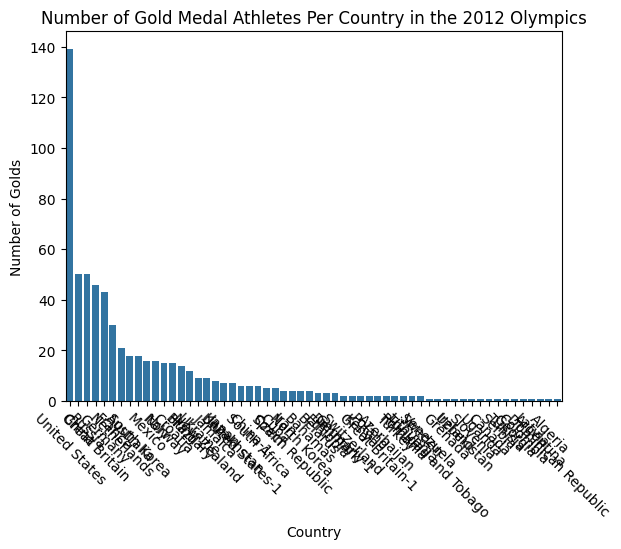

In [66]:
#same thing as above, uncomment the stuff below once you've done the stuff above

sns.barplot(golds, x='Team', y='Golds')
plt.xticks(rotation=-45)
plt.xlabel('Country')
plt.ylabel('Number of Golds')
plt.title('Number of Gold Medal Athletes Per Country in the 2012 Olympics')
plt.show()

Switching gears a bit, we can also make a pretty simple histogram (frequency) plot just based on the data in one column, putting each value into a bin. Let's do this for the athlete's ages, putting each of them into 20 unique bins:

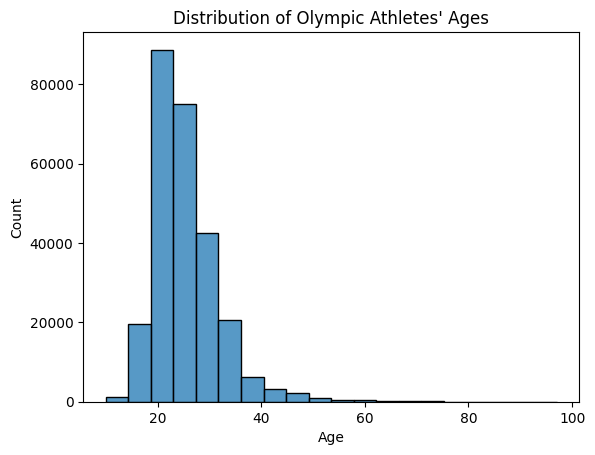

In [53]:
sns.histplot(olympics, x='Age', bins=20)
plt.title('Distribution of Olympic Athletes\' Ages')
plt.show()

With a title and a good bin distribution, you can pretty easily make a solid visual, which is very helpful for exploratory data analysis. The graph above is also good news for us - we don't have to feel old yet, though there are some teenagers in the Olympics.

Let's turn it to you now. Here I'm giving you the starter code that filters the dataset to just the 100 meter dash from the 2016 summer olympics. Using this dataset, I want you to make a scatter plot of each of the athletes `Height` (X-axis) and `Weight` (Y-Axis). Then, I want you to use the `hue` parameter to color each of the points based on the `Medal` category, which will only color the athletes who received a Gold, Silver, or Bronze medal.

I'm not going to give you the expected output here, but you can either Google the race results as a check or just use your prior knowledge about who won the event and their body type. 

If it helps you check your understanding, try adding the line `plt.annotate(text="Usain Bolt", xy=(188,95))` to your plot, which should line up in an expected spot.

In [73]:
#A3 given code
fastest = duckdb.sql("""SELECT * FROM olympics 
                      WHERE Games = '2016 Summer' AND SEX = 'M' AND Event LIKE '%s 100 metres%'
                      AND Sport = 'Athletics'""").df()

fastest['Medal'] = fastest['Medal'].fillna("")

fastest.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,611,Mohammed Abukhousa,M,23.0,170.0,67.0,Palestine,PLE,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,
1,804,Antoine Xavier Adams,M,27.0,180.0,79.0,Saint Kitts and Nevis,SKN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,
2,1421,Masbah Ahmmed,M,21.0,NaN,NaN,Bangladesh,BAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,
3,1946,Barakat Mubarak Al-Harthi,M,28.0,173.0,67.0,Oman,OMA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,
4,5561,Nickel Ashmeade,M,26.0,183.0,77.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,


Text(188, 95, 'Usain Bolt')

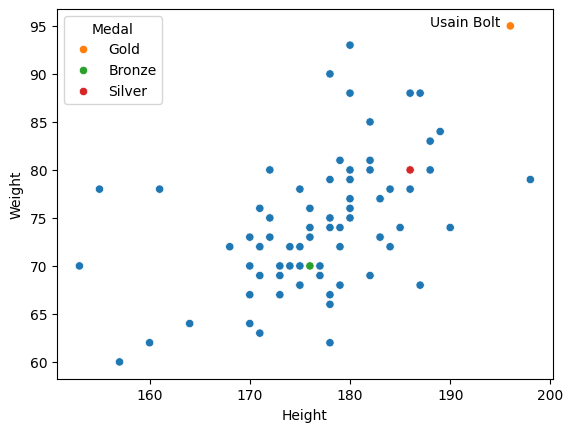

In [74]:
#A3 your code here
sns.scatterplot(fastest, x='Height', y='Weight', hue="Medal")

# Check
plt.annotate(text="Usain Bolt", xy=(188,95))

Just saying, if we wanted to automatically add labels to certain values in this plot, we could do that with a for loop in a few lines of code. That's a bit beyond what's necessary here and frankly, Python makes adding labels to points a bit too complicated for my liking, so I'll skip past it for now. Just keep in mind that it's something that's possible, and can help this plot look a bit nicer. 

That's pretty much it: if this section felt a bit shallow that's because it kind of has to be. Knowing how to do the base visualizations is important, but for most of the applications of visuals you'll do later on, there'll be certain things that you just *have* to Google and figure out by yourself since each dataset and application is so unique.

### B: Plotly 

This section is all about Plotly, which is a great tool for programmers to easily make interactive visualizations. The problem I have with Plotly is that it contains its own syntax and it's use cases are a bit specific (for when you're building websites or things that someone can interact with). For that reason, I'm going to make this section pretty brief. 

I highly recommend that you at least scroll through this section to learn about *how* certain plots are created (incase you might be interested or need to make them in the future), but there won't be any 'assignments' for you to complete in here.  

Let's just make a scatter plot of the '1992 Dream Team' USA Men's Olympic Basketball team's heights and weights. Honestly, this plot isn't as meaningful as the rest of the one's we saw above, but it's just a fun little plot we can make with some (hopefully) recognizable names and interaction elements.

In [62]:
import plotly.express as px

In [60]:
#uncomment this if the above gives you an error
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 29.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


First, I'll make a new subset of the original dataset to plot. Nothing new here.

In [63]:
dream_team = duckdb.sql("""SELECT * FROM olympics 
                      WHERE Games = '1992 Summer' AND SEX = 'M' AND Sport='Basketball' AND Team = 'United States'""").df()

dream_team.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,7901,Charles Wade Barkley,M,29.0,198.0,114.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
1,11668,Larry Joe Bird,M,35.0,205.0,100.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
2,30009,Clyde Austin Drexler,M,30.0,200.0,101.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
3,33553,Patrick Aloysius Ewing,M,29.0,213.0,109.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
4,55424,"Earvin ""Magic"" Johnson, Jr.",M,32.0,205.0,100.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold


Now, I'll make the plotly plot. Most of the stuff is self-explanatory, but the syntax is all new compared to Seaborn and matplotlib. Honestly, this isn't the best plot you can get out of plotly, but it serves its purpose in showing *something* that you can make with the Python package. Try hovering over certain names to see the interactive elements of the plot. You can also use the tool bar at the top right to interact with the plot in other ways.

Obviously, this plot could look a lot better, and there could be more interaction, but for now, this is a solid starting point to showcase the benefits of using plotly.

In [64]:
fig = px.scatter(dream_team,x='Height',y='Weight',text='Name', width=800, height=500)
fig.update_layout(title='1992 Dream Team Players\' Heights and Weights',
                  xaxis_title='Height (cm)',
                  yaxis_title='Weight (kg)')
fig.show()

That's it for visualizations, which are, as stated earlier, my favorite part of data science. In the next section you'll see more applications for visualizations as we tackle the last part of NME: Linear Regressions.